In [1]:
import matplotlib.pyplot as plt
import os
import json
import seaborn as sns

In [2]:
avg_speech_rate = 4.0
avg_speech_std = 51.04
avg_speech_ratio = 0.7

In [3]:
directory = '/home/rudito/Code/Cao_Research/Pipeline'
files = os.listdir(directory)
student_files = [file for file in files if file.startswith('Student_') and file.endswith('.json')]
speech_rate_values = []
speech_freq_values = []
speech_noise_values = []
for filename in student_files:
    with open(os.path.join(directory, filename), 'r') as file:
        for line in file:
            # Parse each line as JSON
            entry = json.loads(line)
            speech_rate_values.append(entry['Speech Rate (Syllables per Sec):'])
            speech_freq_values.append(float(entry['Speech Fundamental Frequency STD Deviation:'].strip()))
            speech_noise_values.append(float(entry['Speech to Noise Ratio:']))
speech_rate_values_b = []
speech_freq_values_b = []
speech_noise_values_b = []
baseline_files = [file for file in files if file.startswith('baseline_') and file.endswith('.json')]
for filename in baseline_files:
    with open(os.path.join(directory, filename), 'r') as file:
        for line in file:
            # Parse each line as JSON
            entry = json.loads(line)
            speech_rate_values_b.append(entry['Speech Rate (Syllables per Sec):'])
            speech_freq_values_b.append(float(entry['Speech Fundamental Frequency STD Deviation:'].strip()))
            speech_noise_values_b.append(float(entry['Speech to Noise Ratio:']))

In [4]:
print(speech_rate_values)
print(speech_freq_values)
print(speech_noise_values)
print(speech_rate_values_b)
print(speech_freq_values_b)
print(speech_noise_values_b)

[5, 5, 4, 4, 5, 4, 5, 5, 5]
[35.9, 54.77, 37.16, 31.42, 37.29, 29.64, 36.33, 40.63, 42.89]
[0.8, 0.8, 0.7, 0.7, 0.7, 0.7, 0.6, 0.8, 0.7]
[4, 4, 5, 3, 4, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5]
[43.37, 67.09, 66.85, 38.86, 54.25, 45.43, 49.06, 44.4, 56.75, 63.91, 52.18, 40.16, 32.25, 67.33, 43.66]
[0.7, 0.9, 0.8, 0.7, 0.7, 0.6, 0.7, 0.7, 0.8, 0.7, 0.9, 0.8, 0.7, 0.6, 0.8]


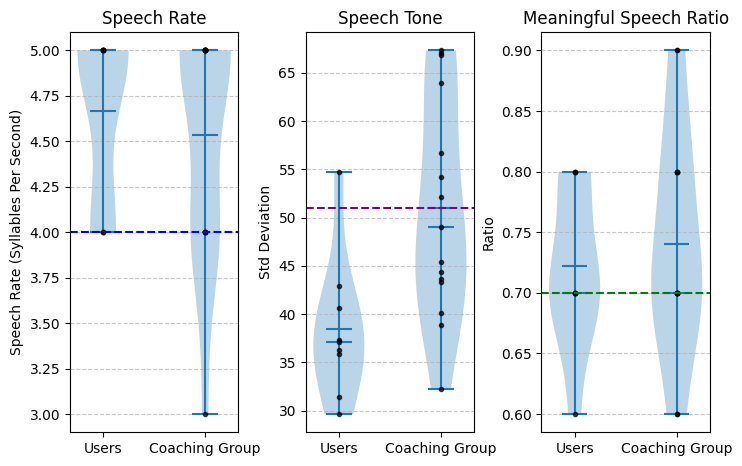

In [6]:
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

user_labels = ["User 1", "User 2", "User 3", "User 4", "User 5", "User 6", "User 7", "User 8", "User 9"]
plt.figure(figsize=(8, 5))
# Subplot 1: Speech Rate
plt.subplot(1, 3, 1)
plt.violinplot([speech_rate_values, speech_rate_values_b], positions=[1, 2], showmeans=True, showmedians=True)
for i, value in enumerate(speech_rate_values):
    plt.plot([1], [value], marker='o', color='black', linestyle='', markersize=3, alpha=0.7)
for i, value in enumerate(speech_rate_values_b):
    plt.plot([2], [value], marker='o', color='black', linestyle='', markersize=3, alpha=0.7)
plt.ylabel("Speech Rate (Syllables Per Second)")
plt.title("Speech Rate")
plt.axhline(y=avg_speech_rate, color='blue', linestyle='dashed', label='Avg. Speech Rate')
plt.xticks([1, 2], ["Users", "Coaching Group"])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Subplot 2: Speech FF Std Deviation
plt.subplot(1, 3, 2)
plt.violinplot([speech_freq_values, speech_freq_values_b], positions=[1, 2], showmeans=True, showmedians=True)
# plt.xlabel("Users")
for i, value in enumerate(speech_freq_values):
    plt.plot([1], [value], marker='o', color='black', linestyle='', markersize=3, alpha=0.7)
for i, value in enumerate(speech_freq_values_b):
    plt.plot([2], [value], marker='o', color='black', linestyle='', markersize=3, alpha=0.7)
plt.ylabel("Std Deviation")
plt.title("Speech Tone")
plt.axhline(y=avg_speech_std, color='purple', linestyle='dashed', label='Avg. Speech Std Dev')
plt.xticks([1, 2], ["Users", "Coaching Group"])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Subplot 3: Speech to Noise Ratio
plt.subplot(1, 3, 3)
plt.violinplot([speech_noise_values, speech_noise_values_b], positions=[1, 2], showmeans=True, showmedians=True)
for i, value in enumerate(speech_noise_values):
    plt.plot([1], [value], marker='o', color='black', linestyle='', markersize=3, alpha=0.7)
for i, value in enumerate(speech_noise_values_b):
    plt.plot([2], [value], marker='o', color='black', linestyle='', markersize=3, alpha=0.7)
plt.ylabel("Ratio")
plt.title("Meaningful Speech Ratio")
plt.axhline(y=avg_speech_ratio, color='green', linestyle='dashed', label='Avg. Speech to Noise Ratio')
plt.xticks([1, 2], ["Users", "Coaching Group"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()
